# Visualize Time-Series Data

In this exercise, you will visualize electricity usage (load) patterns over time using the 'buildings-900k-test' dataset from the BuildingsBench benchmark suite. You will begin by loading the dataset and exploring its key characteristics. As you progress, you will learn how to process and interpret timestamp information, which is essential for analyzing time-series data. You will then visualize energy usage trends at multiple time scales—yearly, monthly, and daily—to build familiarity with the dataset and uncover patterns. Along the way, you will use Matplotlib to create clear and insightful plots, while also reinforcing your understanding of object-oriented programming (OOP) principles. This exercise will introduce you to an essential phase of machine learning model development: exploratory data analysis.

### STEP 1: Load Modules

This section imports essential Python libraries for processing timestamp data and visualizing time-series patterns. It uses numpy for array manipulation and matplotlib.pyplot for generating plots. Additionally, it loads the BuildingsBench module, which provides access to large-scale building energy datasets. 

In [6]:
from os import environ
from warnings import filterwarnings

from numpy import concatenate, datetime64, timedelta64
from matplotlib.pyplot import figure, plot, show, xlabel, ylabel, xticks, yticks, gcf, title, tight_layout, grid

from buildings_bench.transforms import TimestampTransform
from buildings_bench import load_torch_dataset,  benchmark_registry

### STEP 2: Environment Setup

We suppress Python warnings to improve the readability of the output—this step is optional but helpful. We also set the "BUILDINGS_BENCH" environment variable to point to the location of the BuildingsBench dataset on the system.

In [7]:
# Silence FutureWarning messages
filterwarnings("ignore", category=FutureWarning)

In [8]:
# Sets an environment variable indicating the path to the dataset
environ["BUILDINGS_BENCH"] = "/pscratch/sd/n/nrushad/Dataset/"

### STEP 3: Explore buildings-900k-test Characters

In this step, we load the BuildingsBench dataset and examine its structure to understand how the data is organized. The dataset is returned as a Python object containing a dictionary. This dictionary uses PUMA IDs (Public Use Microdata Areas) as keys, where each key maps to a list of individual building data entries. Each building entry includes time-series features such as energy load, day of the year, day of the week, and hour of the day.

In [9]:
# List of benchmark datasets registered in BuildingsBench
print('Available benchmark datasets, ', benchmark_registry)

Available benchmark datasets,  ['buildings-900k-test', 'sceaux', 'borealis', 'ideal', 'bdg-2', 'bdg-2:panther', 'bdg-2:fox', 'bdg-2:rat', 'bdg-2:bear', 'electricity', 'smart', 'lcl']


In [10]:
# Loads the "buildings-900k-test" dataset using a built-in function from the BuildingsBench library
dataset = load_torch_dataset('buildings-900k-test')

# Retrieves the .building_datasets attribute
dataset = dataset.building_datasets

In [11]:
# Prints the type of the dataset object.
print('Dataset Type: ', type(dataset))

# Prints the number of PUMA regions included in the data
print('Dataset Length: ', len(dataset))

Dataset Type:  <class 'dict'>
Dataset Length:  1480


In [12]:
# You noticed that the dataset type is dict, which refers to a dictionary in Python. A dictionary is an unordered collection of key-value pairs that allows you to store and retrieve data efficiently using unique keys.

# Show only first 5 keys for brevity
print('Dataset Keys: ', list(dataset.keys())[:5])

# Show only first 5 values for brevity
print('Dataset Values: ', list(dataset.values())[:5])

Dataset Keys:  ['commercial_puma=G51059305/4390', 'commercial_puma=G51059305/16464', 'commercial_puma=G51059305/19360', 'commercial_puma=G51059305/23149', 'commercial_puma=G51059305/23184']
Dataset Values:  [<buildings_bench.data.datasets.TorchBuildingDataset object at 0x7f1d2a2b6e30>, <buildings_bench.data.datasets.TorchBuildingDataset object at 0x7f1d2a2ad8d0>, <buildings_bench.data.datasets.TorchBuildingDataset object at 0x7f1d2a2b4a30>, <buildings_bench.data.datasets.TorchBuildingDataset object at 0x7f1d2a2ae1a0>, <buildings_bench.data.datasets.TorchBuildingDataset object at 0x7f1d2a2ad2d0>]


### STEP 4: Visualize Dataset

This code defines a DataVisualization class that provides a structured way to visualize time-series data. It extracts load and timestamp information for a selected entry, converts the time features into readable datetime format, and plots the load over time. In the main block, two examples — one commercial (commercial_puma=G42000900/3960) and one residential (residential_puma=G06000702/233130) — are selected from different PUMA regions. Once you run the code, you will be able to visualize energy usage patterns for both PUMA IDs.

Acknowldgement: The code below is adapted from the BuildingsBench tutorial and formatted to fit the current exercise. The original code can be found here: https://github.com/NREL/BuildingsBench/blob/main/tutorials/dataset_quick_start.ipynb

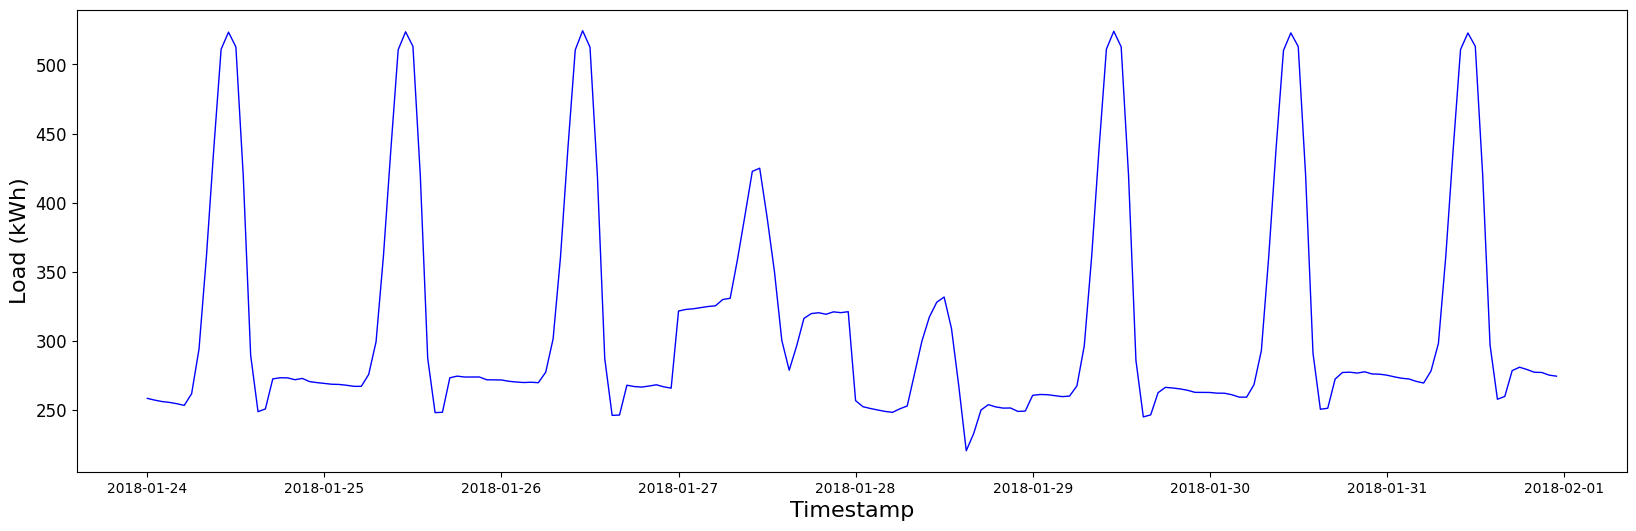

In [ ]:
# Define a class for visualizing load time-series
class DataVisualization:
    def __init__(self, dataset, puma_id, idx=0):
        # Get one building entry from specified PUMA and index
        self.dataset = dataset[puma_id][idx]
  
    def load(self):
        # Return load (energy usage) values
        return self.dataset['load']

    def dt(self):
        # Convert time features to datetime
        timestamp_transform = TimestampTransform()
        timestamp = concatenate([
            self.dataset['day_of_year'],       # Day index (1–365)
            self.dataset['day_of_week'],       # Weekday (0–6)
            self.dataset['hour_of_day']], -1)  # Hour (0–23)

        # Restore to full timestamp
        timestamp = timestamp_transform.undo_transform(timestamp)

        # Compute datetime from start date
        dt = datetime64('2018-01-01') + timedelta64(1, 'D') * (timestamp[..., 0] - 1) + timedelta64(1, 'h') * timestamp[..., -1]
        
        # datetime64('2018-01-01'): Base date we start counting from
        
        # timestamp[..., 0]: Day of the year (1 to 365)
        # (timestamp[..., 0] - 1): Subtract 1 so that Jan 1 maps to 0 days
        
        # timedelta64(1, 'D') * (timestamp[..., 0] - 1): Calculates how many full days to add to the base date
        # timestamp[..., -1]: Hour of the day (0 to 23)
        # timedelta64(1, 'h') * timestamp[..., -1]: Calculates how many hours to add

        return dt

    def plot_load(self, dt, load, figsize=(20,6)):
        figure(figsize=figsize)               # Establish a figure and its size
        # Plot load vs. time with blue line and width 1
        plot(dt.reshape(-1), load.reshape(-1), color='blue', linewidth=1)
        ylabel('Load (kWh)', fontsize=16)     # Y-axis label
        xlabel('Timestamp', fontsize=16)      # X-axis label
        yticks(fontsize=12)                   # Y-axis ticks
        xticks(fontsize=10)                   # X-axis ticks
        show()                                # Display plot

    def visualize(self):
        # Retrieve datetime and load, then plot them
        dt = self.dt()
        load = self.load()
        self.plot_load(dt, load)

if __name__ == "__main__":
    idx = 23  # Select day index

    # Visualize commercial building
    x = DataVisualization(dataset=dataset, puma_id='commercial_puma=G42000900/3960', idx=idx)
    x.visualize()

    # Visualize residential building
    x = DataVisualization(dataset=dataset, puma_id='residential_puma=G06000702/233130', idx=idx)
    x.visualize()

### Exercise 1

In this exercise, you will explore energy load patterns for multiple buildings. Your task is to visualize the time-series load data for at least three commercial and three residential PUMA IDs. By changing the puma_id while keeping the index (idx=0) fixed, you can analyze how load patterns vary across different buildings. You are encouraged to use the provided example PUMA IDs or explore additional ones by printing the dataset keys.

Commercial: 
1) 'commercial_puma=G42000900/4459' 
2) 'commercial_puma=G42000900/12468' 
3) 'commercial_puma=G42000900/40367'

Residential: 
1) 'residential_puma=G42000900/5052' 
2) 'residential_puma=G42000900/41584' 
3) 'residential_puma=G42000900/126330'

In [2]:
class DataVisualization:
    def __init__(self, dataset, puma_id, idx=0):
        self.dataset = dataset[puma_id][idx]
  
    def load(self):
        return self.dataset['load']

    def dt(self):
        timestamp_transform = TimestampTransform()
        timestamp = concatenate([
            self.dataset['day_of_year'],    
            self.dataset['day_of_week'],
            self.dataset['hour_of_day']], -1)
        timestamp = timestamp_transform.undo_transform(timestamp)
        dt = datetime64(f'2018-01-01') + timedelta64(1, 'D') * (timestamp[...,0]-1) + timedelta64(1, 'h') * timestamp[...,-1]
        return dt

    def plot_load(self, dt, load, figsize=(20,6)):
        figure(figsize=figsize)
        plot(dt.reshape(-1), load.reshape(-1), color='blue', linewidth=1)
        ylabel('Load (kWh)', fontsize=16)
        xlabel('Timestamp', fontsize=16)
        yticks(fontsize=12)
        xticks(fontsize=10)
        show()

    def visualize(self):
        dt = self.dt()
        load = self.load()
        self.plot_load(dt, load)
        
if __name__ == "__main__":
    # TODO:
    # Visualize the load data for idx = 0 using three PUMA IDs.
    # You may use the three example PUMA IDs provided, or explore others of your choice.

### Excersice 2

Similar to Exercise 1, you will explore time-series energy load data. However, instead of changing the puma_id, you will vary the index value (idx). Select one residential and one commercial PUMA ID from those used in Exercise 1. Each index corresponds to a specific day of the year (ranging from 0 to 364). By selecting three different index values for each PUMA ID, you can observe how load patterns change across different days for the same building. This will help you understand how energy usage fluctuates over the course of a year at a single location.

In [ ]:
class DataVisualization:
    def __init__(self, dataset, puma_id, idx=0):
        self.dataset = dataset[puma_id][idx]
  
    def load(self):
        return self.dataset['load']

    def dt(self):
        timestamp_transform = TimestampTransform()
        timestamp = concatenate([
            self.dataset['day_of_year'],    
            self.dataset['day_of_week'],
            self.dataset['hour_of_day']], -1)
        timestamp = timestamp_transform.undo_transform(timestamp)
        dt = datetime64(f'2018-01-01') + timedelta64(1, 'D') * (timestamp[...,0]-1) + timedelta64(1, 'h') * timestamp[...,-1]
        return dt

    def plot_load(self, dt, load, figsize=(20,6)):
        figure(figsize=figsize)
        plot(dt.reshape(-1), load.reshape(-1), color='blue', linewidth=1)
        ylabel('Load (kWh)', fontsize=16)
        xlabel('Timestamp', fontsize=16)
        yticks(fontsize=12)
        xticks(fontsize=10)
        show()

    def visualize(self):
        dt = self.dt()
        load = self.load()
        self.plot_load(dt, load)
        
if __name__ == "__main__":
    # TODO:
    # Select one commercial and one residential PUMA ID used in Exercise 1
    # Visualize the load data for three different index values within the range [0, 364]

### Excersice 3

Use the residential and commercial PUMA IDs from Exercise 2, but select specific index values (idx) to observe patterns on U.S. holidays. Use the following index values to visualize energy load on:

1) Martin Luther King Jr. Day → idx = 14
2) Presidents Day → idx = 48
3) Memorial Day → idx = 141

Then, identify an appropriate idx for each of the following two holidays and visualize the load patterns:

1) Independence Day → choose an idx in the range [175, 185]
2) Labor Day → choose an idx in the range [235, 245]

In [ ]:
class DataVisualization:
    def __init__(self, dataset, puma_id, idx=0):
        self.dataset = dataset[puma_id][idx]
  
    def load(self):
        return self.dataset['load']

    def dt(self):
        timestamp_transform = TimestampTransform()
        timestamp = concatenate([
            self.dataset['day_of_year'],    
            self.dataset['day_of_week'],
            self.dataset['hour_of_day']], -1)
        timestamp = timestamp_transform.undo_transform(timestamp)
        dt = datetime64(f'2018-01-01') + timedelta64(1, 'D') * (timestamp[...,0]-1) + timedelta64(1, 'h') * timestamp[...,-1]
        return dt

    def plot_load(self, dt, load, figsize=(20,6)):
        figure(figsize=figsize)
        plot(dt.reshape(-1), load.reshape(-1), color='blue', linewidth=1)
        ylabel('Load (kWh)', fontsize=16)
        xlabel('Timestamp', fontsize=16)
        yticks(fontsize=12)
        xticks(fontsize=10)
        show()

    def visualize(self):
        dt = self.dt()
        load = self.load()
        self.plot_load(dt, load)
        
if __name__ == "__main__":
    # TODO:
    # Create an instance of the DataVisualization class.
    
    # TODO:
    # For the PUMA IDs identified in Exercise 2, visualize the load data for the following holidays:
    # - Martin Luther King Jr. Day (MLK Day): idx = 14
    # - Presidents Day: idx = 48
    # - Memorial Day: idx = 141

    # TODO:
    # Identify the index values (idx) for the following holidays:
    # - Independence Day (within the range [175, 185])
    # - Labor Day (within the range [235, 245])
    # Once identified, visualize the load data for both holidays using the PUMA IDs selected in Exercise 2.

### Excersice 4

In this exercise, you will create visualizations of time-series load data at different time scales. Your task is to complete the methods and generate plots for:

1) The entire year
2) A selected month
3) A specific day

Each method should extract the relevant time range from the dataset and use the corresponding timestamps and load values to create a plot. Use formatted strings such as '2018-{month:02d}' or '2018-{month:02d}-{day:02d}' to filter data by month or day.

In [ ]:
class DataVisualization:
    def __init__(self, dataset, puma_id, idx=0):
        self.dataset = dataset[puma_id].df

    def plot_load(self, timestamp, load, figsize=(20,6)):
        figure(figsize=figsize)
        # TODO:
        # Implement the plot function using timestamp and load
        ylabel('Load (kWh)', fontsize=16)
        xlabel('Timestamp', fontsize=16)
        yticks(fontsize=12)
        xticks(fontsize=10)
        show()

    def year_plot(self, figsize=(20,6)):
        timestamp = self.dataset['power'].index  
        load = self.dataset['power'].values
        # TODO:
        # Use the plot_load method to visualize the entire year's data
    
    def month_plot(self, month, figsize=(20,6)):
        timestamp = self.dataset['power'][f'2018-{month:02d}'].index
        # TODO:
        # Initialize the corresponding load values for the selected month
        # Use the plot_load method to visualize the selected month's data

    def day_plot(self, day, month, figsize=(20,6)):
        # TODO:
        # Filter and initialize both timestamp and load for the given day and month
        # Use {day:02d} and {month:02d} to format the date string correctly
        # Use the plot_load method to visualize the selected day's data

if __name__ == "__main__":
    # TODO:
    # Create an instance of the DataVisualization class
    # Call year_plot, month_plot, and day_plot methods to visualize respective data